In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Baca dataset (asumsikan dataset dalam format CSV)
df = pd.read_csv('nutrition.csv')
df.head()

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1346 non-null   int64  
 1   calories      1346 non-null   float64
 2   proteins      1346 non-null   float64
 3   fat           1346 non-null   float64
 4   carbohydrate  1346 non-null   float64
 5   name          1346 non-null   object 
 6   image         1346 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 73.7+ KB


In [ ]:
df.drop(['image', 'id'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      1346 non-null   float64
 1   proteins      1346 non-null   float64
 2   fat           1346 non-null   float64
 3   carbohydrate  1346 non-null   float64
 4   name          1346 non-null   object 
dtypes: float64(4), object(1)
memory usage: 52.7+ KB


In [ ]:
df.isnull().sum( )

,0
calories,0
proteins,0
fat,0
carbohydrate,0
name,0


In [ ]:
df.shape

(1346, 5)

<Axes: >

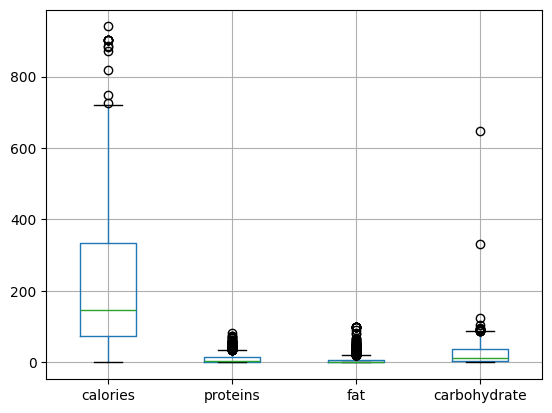

In [ ]:
df.boxplot()

In [ ]:
#Mengimport stats dari scipy dan menghitung zscore dari kolom calories dan fat
from scipy import stats

z = np.abs(stats.zscore(df[['calories', 'fat', 'carbohydrate', 'proteins']]))
z

,calories,fat,carbohydrate,proteins
0,0.471016,1.516319,0.788979,0.067648
1,1.900334,2.142778,0.127099,1.156645
2,1.246619,0.537882,0.788979,0.844440
3,0.970570,0.523313,0.453378,0.751562
4,1.019646,0.516029,0.670897,0.472930
...,...,...,...,...
1341,0.988974,0.508745,0.499989,0.743119
1342,1.019646,0.508745,0.531063,0.760006
1343,1.074855,0.516029,0.593211,0.785336
1344,0.311521,0.472323,1.016429,0.591138


In [ ]:
#Menghapus outlier dengan zscore
df = df.drop(np.unique(np.where(z>3)[0]))
df

,calories,proteins,fat,carbohydrate,name
0,280.0,9.2,28.4,0.0,Abon
1,513.0,23.7,37.0,21.3,Abon haruwan
2,0.0,0.0,0.2,0.0,Agar-agar
3,45.0,1.1,0.4,10.8,Akar tonjong segar
4,37.0,4.4,0.5,3.8,Aletoge segar
...,...,...,...,...,...
1341,42.0,1.2,0.6,9.3,Wortel Segar
1342,37.0,1.0,0.6,8.3,Wortel kukus
1343,28.0,0.7,0.5,6.3,Wortel rebus
1344,254.0,3.0,1.1,58.1,Yangko


In [ ]:
#Mengatur ulang index pada dataset
df = df.reset_index(drop = True)
df

,calories,proteins,fat,carbohydrate,name
0,280.0,9.2,28.4,0.0,Abon
1,513.0,23.7,37.0,21.3,Abon haruwan
2,0.0,0.0,0.2,0.0,Agar-agar
3,45.0,1.1,0.4,10.8,Akar tonjong segar
4,37.0,4.4,0.5,3.8,Aletoge segar
...,...,...,...,...,...
1281,42.0,1.2,0.6,9.3,Wortel Segar
1282,37.0,1.0,0.6,8.3,Wortel kukus
1283,28.0,0.7,0.5,6.3,Wortel rebus
1284,254.0,3.0,1.1,58.1,Yangko


<Axes: >

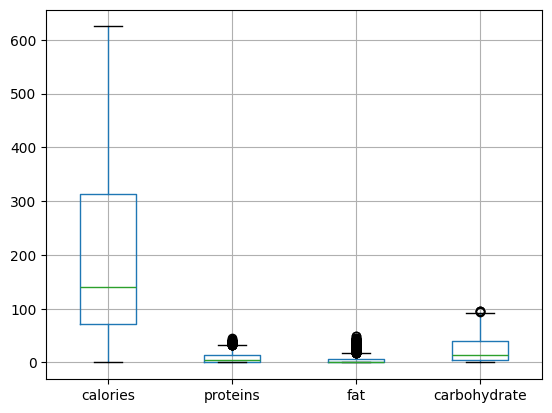

In [ ]:
df.boxplot()

In [ ]:
df.shape

(1286, 5)

In [ ]:
df# Total jumlah makanan dalam dataset
total_items = len(df)

# Jumlah makanan dengan kalori di bawah 100
below_100 = len(df[df['calories'] < 100])

# Jumlah makanan dengan kalori di atas 500
above_500 = len(df[df['calories'] > 500])

# Menghitung persentase
percent_below_100 = (below_100 / total_items) * 100
percent_above_500 = (above_500 / total_items) * 100

In [ ]:
# Menampilkan hasil
print(f"Persentase makanan dengan kalori di bawah 100: {percent_below_100:.2f}%")
print(f"Persentase makanan dengan kalori di atas 500: {percent_above_500:.2f}%")

Persentase makanan dengan kalori di bawah 100: 35.77%
Persentase makanan dengan kalori di atas 500: 2.72%


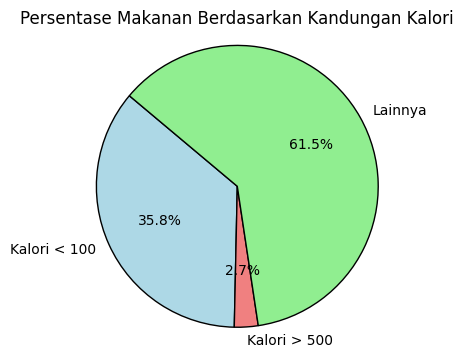

In [ ]:
# Data untuk visualisasi
labels = ['Kalori < 100', 'Kalori > 500', 'Lainnya']
sizes = [percent_below_100, percent_above_500, 100 - (percent_below_100 + percent_above_500)]
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Membuat pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('Persentase Makanan Berdasarkan Kandungan Kalori')
plt.show()

In [ ]:
# Menghitung rata-rata kalori, protein, lemak, dan karbohidrat
average_calories = df['calories'].mean()
average_protein = df['proteins'].mean()

# Memilih makanan dengan kalori di bawah rata-rata, tetapi protein atau makronutrien lainnya di atas rata-rata
low_calorie_high_protein = df[
    (df['calories'] < average_calories) &
    ((df['proteins'] > average_protein))
]

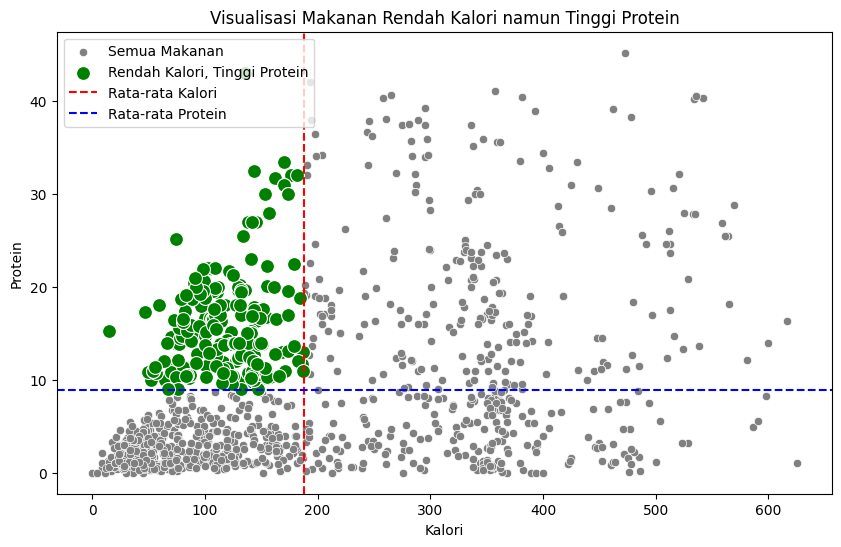

In [ ]:
# Visualisasi makanan rendah kalori dan tinggi makronutrien
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calories', y='proteins', color='gray', label='Semua Makanan')
sns.scatterplot(data=low_calorie_high_protein, x='calories', y='proteins', color='green', label='Rendah Kalori, Tinggi Protein', s=100, marker='o')

plt.axvline(x=average_calories, color='red', linestyle='--', label='Rata-rata Kalori')
plt.axhline(y=average_protein, color='blue', linestyle='--', label='Rata-rata Protein')

plt.title('Visualisasi Makanan Rendah Kalori namun Tinggi Protein')
plt.xlabel('Kalori')
plt.ylabel('Protein')
plt.legend()
plt.show()

In [ ]:
X = df[['proteins', 'fat', 'carbohydrate']]
y = df['calories']

In [ ]:
# Split dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Inisialisasi dan latih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Inisialisasi model baru
rf_model = RandomForestRegressor(random_state=0, n_estimators=100)
gb_model = GradientBoostingRegressor(random_state=0, n_estimators=100)

# Latih Random Forest Regressor
rf_model.fit(X_train, y_train)

# Latih Gradient Boosting Regressor
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
# # Evaluasi model
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

In [ ]:
# print("Hasil Evaluasi Model:")
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared Score: {r2:.2f}")

In [ ]:
y_pred = model.predict(X_test)

# Prediksi menggunakan Random Forest
rf_pred = rf_model.predict(X_test)

# Prediksi menggunakan Gradient Boosting
gb_pred = gb_model.predict(X_test)

# Evaluasi Linear Regression
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

# Evaluasi Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Evaluasi Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

In [ ]:
# Print hasil evaluasi
print("Linear Regression:")
print(f"Mean Squared Error: {lr_mse:.2f}\nR-squared: {lr_r2:.2f}")

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {rf_mse:.2f}\nR-squared: {rf_r2:.2f}")

print("\nGradient Boosting Regressor:")
print(f"Mean Squared Error: {gb_mse:.2f}\nR-squared: {gb_r2:.2f}")

Linear Regression:
Mean Squared Error: 592.45
R-squared: 0.97

Random Forest Regressor:
Mean Squared Error: 743.42
R-squared: 0.96

Gradient Boosting Regressor:
Mean Squared Error: 779.93
R-squared: 0.96


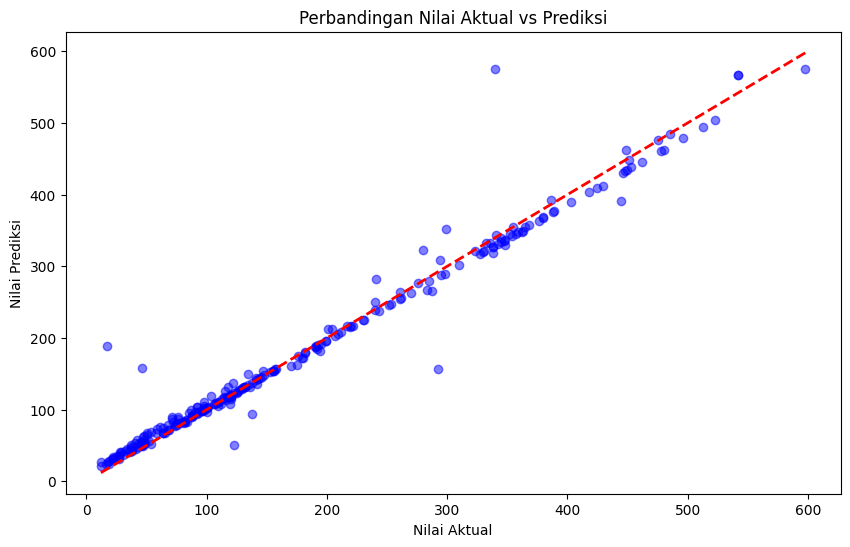

In [ ]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.show()

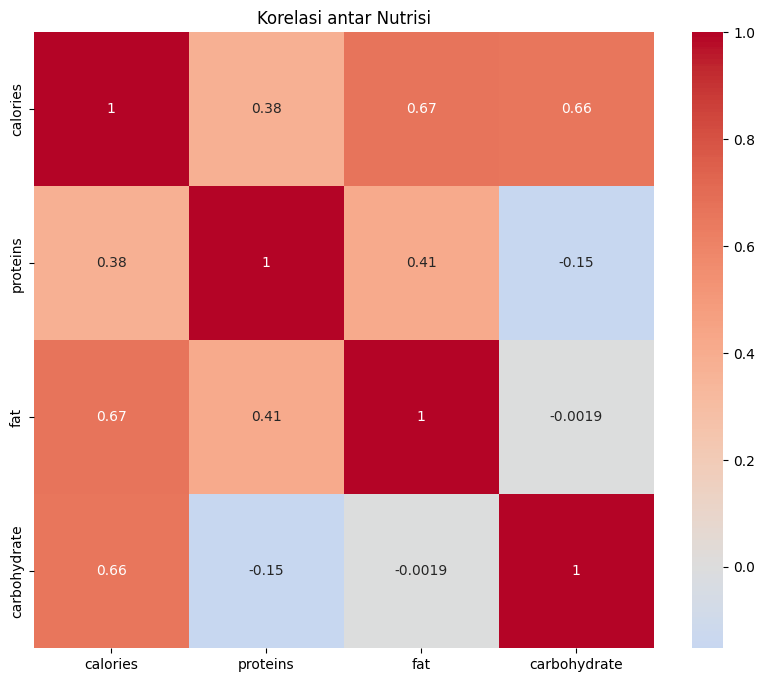

In [ ]:
# Analisis korelasi antar nutrisi
correlation_matrix = df[['calories', 'proteins', 'fat', 'carbohydrate']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antar Nutrisi')
plt.show()

Testing

In [ ]:
def predict_calories(proteins, fat, carbohydrate):
    """
    Metode untuk memprediksi kalori berdasarkan input fitur.

    Parameters:
    - proteins: jumlah protein dalam gram (float)
    - fat: jumlah lemak dalam gram (float)
    - carbohydrate: jumlah karbohidrat dalam gram (float)

    Returns:
    - Prediksi jumlah kalori (float)
    """
    # Pastikan input dalam bentuk numpy array 2D
    input_features = np.array([[proteins, fat, carbohydrate]])

    # Prediksi kalori menggunakan model
    predicted_calories = model.predict(input_features)

    return predicted_calories[0]


In [ ]:
# Contoh pengujian model
proteins = 20.0  # gram
fat = 10.0        # gram
carbohydrate = 20.0  # gram

predicted_calories = predict_calories(proteins, fat, carbohydrate)
print(f"Prediksi kalori: {predicted_calories:.2f} kcal")

Prediksi kalori: 244.35 kcal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Contoh fungsi untuk memberikan saran nutrisi berdasarkan tujuan kesehatan
def get_nutrition_recommendation(weight, height, age, goal):
    """
    Fungsi untuk memberikan rekomendasi nutrisi berdasarkan tujuan kesehatan

    Parameters:
    weight (float): Berat badan dalam kg
    height (float): Tinggi badan dalam cm
    age (int): Usia dalam tahun
    goal (str): Tujuan kesehatan ('weight_loss', 'muscle_gain', 'maintenance')

    Returns:
    dict: Rekomendasi nutrisi harian
    """
    # Hitung BMR (Basal Metabolic Rate) menggunakan formula Harris-Benedict
    bmr = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)

    # Sesuaikan kebutuhan kalori berdasarkan tujuan
    if goal == 'weight_loss':
        target_calories = bmr * 0.85  # Defisit kalori 15%
    elif goal == 'muscle_gain':
        target_calories = bmr * 1.15  # Surplus kalori 15%
    else:  # maintenance
        target_calories = bmr

    # Hitung kebutuhan makronutrien
    protein = weight * 2.0  # 2g protein per kg berat badan
    fat = (target_calories * 0.25) / 9  # 25% dari total kalori
    carbs = (target_calories - (protein * 4) - (fat * 9)) / 4

    return {
        'target_calories': round(target_calories),
        'protein': round(protein),
        'fat': round(fat),
        'carbohydrate': round(carbs)
    }

def get_food_recommendations(target_nutrients, food_database, tolerance=0.2):
    """
    Memberikan rekomendasi makanan berdasarkan target nutrisi

    Parameters:
    target_nutrients (dict): Target nutrisi yang diinginkan
        Format: {'calories': float, 'protein': float, 'fat': float, 'carbohydrate': float}
    food_database (pd.DataFrame): Database makanan dengan kolom:
        'food_name', 'calories', 'proteins', 'fat', 'carbohydrate', 'portion_size'
    tolerance (float): Toleransi perbedaan nutrisi (default 20%)

    Returns:
    dict: Rekomendasi makanan untuk sarapan, makan siang, dan makan malam
    """
    daily_meals = {
        'sarapan': 0.3,  # 30% dari total kalori
        'makan_siang': 0.4,  # 40% dari total kalori
        'makan_malam': 0.3   # 30% dari total kalori
    }

    recommendations = {}

    for meal, proportion in daily_meals.items():
        # Hitung target nutrisi untuk setiap waktu makan
        meal_targets = {
            'calories': target_nutrients['target_calories'] * proportion,
            'protein': target_nutrients['protein'] * proportion,
            'fat': target_nutrients['fat'] * proportion,
            'carbohydrate': target_nutrients['carbohydrate'] * proportion
        }

        # Filter makanan yang sesuai dengan target (dalam range toleransi)
        suitable_foods = df[
            (df['calories'] >= meal_targets['calories'] * (1 - tolerance)) &
            (df['calories'] <= meal_targets['calories'] * (1 + tolerance)) &
            (df['proteins'] >= meal_targets['protein'] * (1 - tolerance)) &
            (df['proteins'] <= meal_targets['protein'] * (1 + tolerance))
        ]

        # Pilih 3 makanan random dari hasil filter
        if len(suitable_foods) >= 3:
            recommendations[meal] = suitable_foods.sample(n=3)[['name', 'calories', 'proteins', 'fat', 'carbohydrate']].to_dict('records')
        else:
            # Jika tidak cukup makanan yang sesuai, ambil yang paling mendekati
            recommendations[meal] = df.iloc[
                (abs(df['calories'] - meal_targets['calories'])).argsort()[:3]
            ][['name', 'calories', 'proteins', 'fat', 'carbohydrate']].to_dict('records')

    return recommendations

def print_meal_recommendations(recommendations):
    """
    Mencetak rekomendasi makanan dalam format yang mudah dibaca
    """
    print("\nRekomendasi Menu Makanan Harian:")
    print("=" * 50)

    for meal, foods in recommendations.items():
        print(f"\n{meal.upper()}:")
        print("-" * 30)
        for i, food in enumerate(foods, 1):
            print(f"\nOpsi {i}:")
            print(f"Nama: {food['name']}")
            print(f"Nutrisi per porsi:")
            print(f"- Kalori: {food['calories']} kkal")
            print(f"- Protein: {food['proteins']}g")
            print(f"- Lemak: {food['fat']}g")
            print(f"- Karbohidrat: {food['carbohydrate']}g")

In [ ]:
# Contoh penggunaan fungsi rekomendasi
sample_recommendation = get_nutrition_recommendation(
    weight=62,  # kg
    height=173,  # cm
    age=21,     # tahun
    goal='muscle_gain'
)

# Mendapatkan rekomendasi makanan berdasarkan hasil prediksi
recommendations = get_food_recommendations(sample_recommendation, df)
print("\nTarget Nutrisi Harian (dari hasil prediksi):")
print(f"Kalori: {sample_recommendation['target_calories']} kkal")
print(f"Protein: {sample_recommendation['protein']}g")
print(f"Lemak: {sample_recommendation['fat']}g")
print(f"Karbohidrat: {sample_recommendation['carbohydrate']}g")

# Menampilkan rekomendasi makanan
print_meal_recommendations(recommendations)

# print("\nContoh Rekomendasi Nutrisi:")
# print(sample_recommendation)


Target Nutrisi Harian (dari hasil prediksi):
Kalori: 1874 kkal
Protein: 124g
Lemak: 52g
Karbohidrat: 227g

Rekomendasi Menu Makanan Harian:

SARAPAN:
------------------------------

Opsi 1:
Nama: Rusa daging dendeng mentah
Nutrisi per porsi:
- Kalori: 536.0 kkal
- Protein: 40.5g
- Lemak: 41.5g
- Karbohidrat: 0.0g

Opsi 2:
Nama: Naan maran sapi masakan
Nutrisi per porsi:
- Kalori: 478.0 kkal
- Protein: 38.3g
- Lemak: 33.9g
- Karbohidrat: 5.1g

Opsi 3:
Nama: Teripang dendeng mentah
Nutrisi per porsi:
- Kalori: 462.0 kkal
- Protein: 39.1g
- Lemak: 32.4g
- Karbohidrat: 3.5g

MAKAN_SIANG:
------------------------------

Opsi 1:
Nama: Pisang Siam goreng
Nutrisi per porsi:
- Kalori: 625.0 kkal
- Protein: 1.0g
- Lemak: 0.0g
- Karbohidrat: 8.1g

Opsi 2:
Nama: Kacang mete/biji jambu monyet segar
Nutrisi per porsi:
- Kalori: 616.0 kkal
- Protein: 16.3g
- Lemak: 48.4g
- Karbohidrat: 28.7g

Opsi 3:
Nama: Noga Kacang Tanah 
Nutrisi per porsi:
- Kalori: 600.0 kkal
- Protein: 14.0g
- Lemak: 41.7g
- K

In [ ]:
# # Simpan model (opsional)
# import joblib
# joblib.dump(model, 'nutrition_model.pkl')

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

X = df[['proteins', 'fat', 'carbohydrate']]
y = df['calories']

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input dengan jumlah fitur
    tf.keras.layers.Dense(1, activation='linear')  # Layer output
])

# Kompilasi model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluasi model
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, MAE: {mae}")

# Simpan model dalam format SavedModel
model.export("saved_model/")

# Konversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()

# Simpan model TFLite
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model TFLite berhasil dibuat!")

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 71401.7578 - mae: 211.3953 - val_loss: 66112.0078 - val_mae: 207.5034
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66269.6094 - mae: 204.1119 - val_loss: 65482.1602 - val_mae: 206.4612
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66543.0391 - mae: 203.6778 - val_loss: 64852.9609 - val_mae: 205.4146
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64733.9180 - mae: 200.1212 - val_loss: 64234.2227 - val_mae: 204.3810
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63821.3203 - mae: 200.3798 - val_loss: 63610.2031 - val_mae: 203.3327
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68812.7812 - mae: 209.6741 - val_loss: 62985.8633 - val_mae: 202.2796
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64763.6133 - mae: 200.3818 - val_loss: 62391.2969 - val_mae: 201.2706
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59937.6680 - mae: 193.7275 - val_loss: 61800.